In [10]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
IMAGES_DIR = "./images/"
LABEL_FILE = "./labels.csv"

In [53]:
image_files = glob.glob(os.path.join(IMAGES_DIR, '*'))
n_images = len(image_files)
print(n_images, "image files")

15115 image files


In [60]:
with open(LABEL_FILE, 'r') as f:
    lines = f.readlines()
lines = list(map(lambda s:s.strip(), lines))
print(len(lines), "label series")

14040 label series


In [55]:
lines

['0000001.jpeg,ink,inktober',
 '0000002.jpeg,ink,day,inktober',
 '0000003.jpeg,ink,inktober,drawing',
 '0000004.jpeg,ink,inktober,drawing',
 '0000005.jpeg,art,tiger,digital',
 '0000006.jpeg,lion,painting',
 '0000007.jpeg,lion',
 '0000008.jpeg,portrait,cat,loaf,art,pet,animal',
 '0000009.jpeg,starry,cat,art,painting,digital',
 '0000010.jpeg,weasel,starry,art,stoat,animal',
 '0000011.jpeg,snow,leopard,painting',
 '0000012.jpeg,study,lion',
 '0000013.jpeg,art,tiger,digital',
 '0000014.jpeg,starry,space,tiger,nebula,sky',
 '0000015.jpeg,space,tiger,art,nebula,stars,sunset',
 '0000016.jpeg,big,cheetah,alien,cat',
 '0000017.jpeg,bird,rain,art,secretary,digital,stars',
 '0000018.jpeg,starry,drawing,bird,eagle,art,painting,harpy,stars',
 '0000019.jpeg,starry,rain,animal,digital,nebula,ibex,stars',
 '0000020.jpeg,big,cat,art,animal,digital,lions',
 '0000021.jpeg,art,leopard,digital',
 '0000022.jpeg,big,experimental,cat,tiger,art,digital',
 '0000023.jpeg,art,tiger,digital',
 '0000024.jpeg,snow,l

In [56]:
labels_dict = {}
for line in lines:
    row = line.split(',')
    filename = row[0]
    labels = row[1:]
    labels_dict[filename] = labels

In [57]:
labels_dict

{'0000001.jpeg': ['ink', 'inktober'],
 '0000002.jpeg': ['ink', 'day', 'inktober'],
 '0000003.jpeg': ['ink', 'inktober', 'drawing'],
 '0000004.jpeg': ['ink', 'inktober', 'drawing'],
 '0000005.jpeg': ['art', 'tiger', 'digital'],
 '0000006.jpeg': ['lion', 'painting'],
 '0000007.jpeg': ['lion'],
 '0000008.jpeg': ['portrait', 'cat', 'loaf', 'art', 'pet', 'animal'],
 '0000009.jpeg': ['starry', 'cat', 'art', 'painting', 'digital'],
 '0000010.jpeg': ['weasel', 'starry', 'art', 'stoat', 'animal'],
 '0000011.jpeg': ['snow', 'leopard', 'painting'],
 '0000012.jpeg': ['study', 'lion'],
 '0000013.jpeg': ['art', 'tiger', 'digital'],
 '0000014.jpeg': ['starry', 'space', 'tiger', 'nebula', 'sky'],
 '0000015.jpeg': ['space', 'tiger', 'art', 'nebula', 'stars', 'sunset'],
 '0000016.jpeg': ['big', 'cheetah', 'alien', 'cat'],
 '0000017.jpeg': ['bird', 'rain', 'art', 'secretary', 'digital', 'stars'],
 '0000018.jpeg': ['starry',
  'drawing',
  'bird',
  'eagle',
  'art',
  'painting',
  'harpy',
  'stars'],
 

In [58]:
count = 0
for k, v in labels_dict.items():
    if k.endswith('.gif'):
        count += 1
#         print(k)
print(count)

0


(403, 916)
(916, 403, 4)
0000249.png ['use', 'non core widget', 'non core custom box', 'purple and white', 'customization', 'page code', 'page codes', 'blue aesthetic', 'ftu', 'page decoration', 'purple', 'dark', 'non core coding', 'black', 'purple white', 'page deco', 'non core box', 'page coding', 'f2u', 'free to use', 'blurple', 'non core custom boxes', 'non core custom box code', 'aesthetic', 'blue', 'free', 'decor', 'deco', 'non core code', 'page', 'purple blue', 'coding', 'page decor', 'purple black', 'dark aesthetic', 'purple aesthetic', 'decoration', 'non core codes', 'non core']


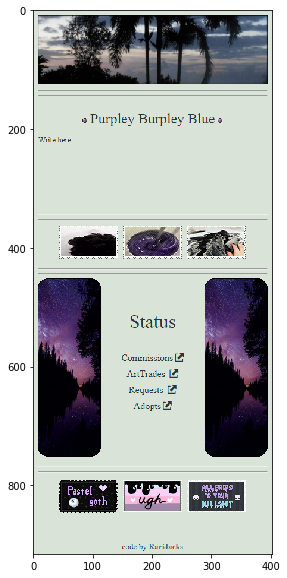

(390, 777)
(777, 390, 4)
0000200.png ['f2u', 'free to use', 'pastel', 'coding', 'pink', 'codes', 'aesthetic', 'pink aesthetic', 'custom box design', 'custom box code', 'pastel pink', 'code', 'customization', 'free', 'custom box', 'pastel aesthetic', 'custom boxes', 'ftu']


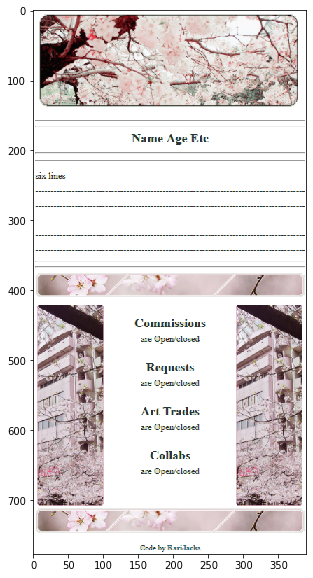

(1024, 683)
(683, 1024, 4)
0004667.jpeg ['circus baby', 'freak show baby', 'scrap baby']


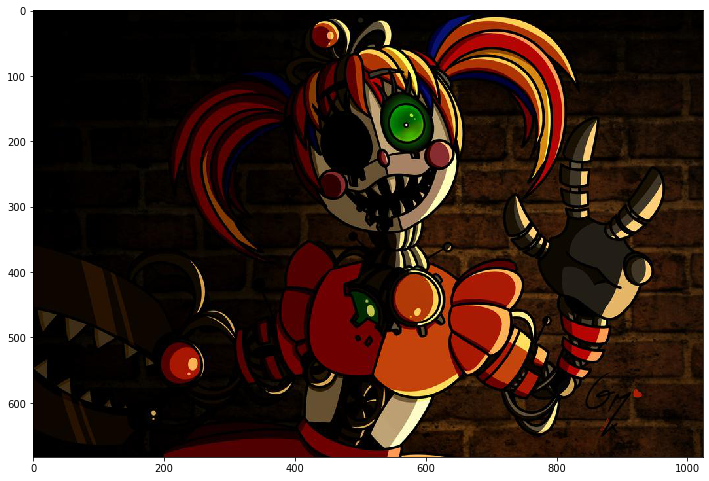

(600, 960)
(960, 600, 4)
0011186.jpeg ['magic', 'urban fantasy', 'mirror', 'book cover', 'fantasy']


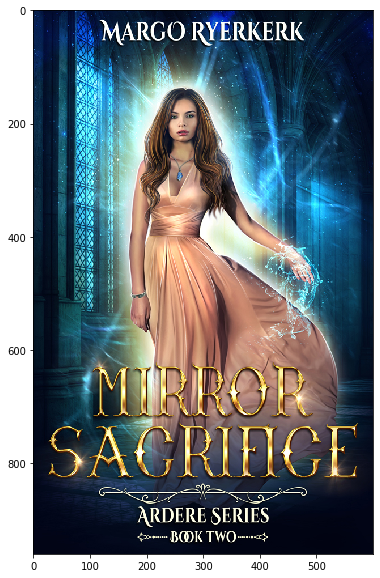

(1024, 1449)
(1449, 1024, 4)
0008044.jpeg ['delta rune']


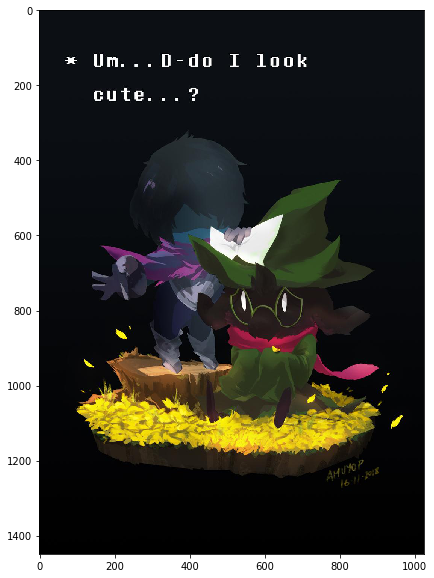

(1280, 1280)
(1280, 1280, 4)
0007181.jpeg ['mega evolution', 'pokemon pokemon', 'pocket monster', 'pokemon nintendo', 'pokemon pocket monsters', 'mega stone', 'pocket monsters', 'pokemon fan art', 'pokemon', 'tyranitar']


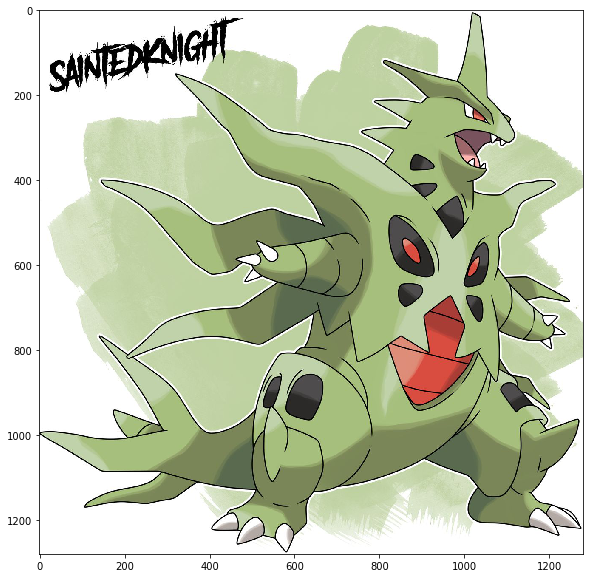

(1024, 576)
(576, 1024, 4)
0012754.jpeg ['fractal art', 'abstract art', 'blue', 'gold', 'water', 'digital art']


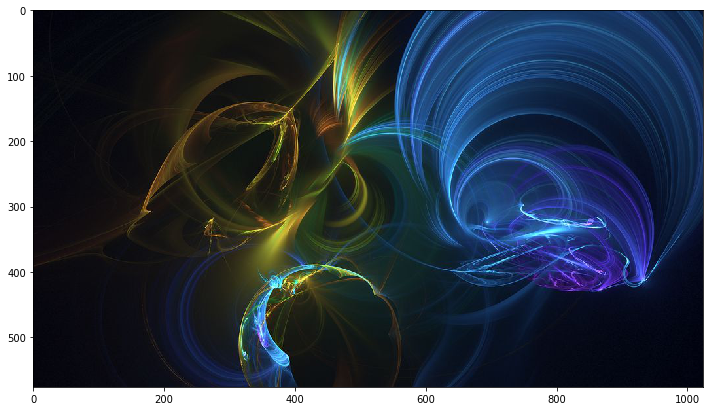

(1024, 1368)
(1368, 1024, 4)
0004579.jpeg ['warriors', 'page', 'warrior cats', 'eyes', 'raven', 'serenity white wolf', 'comic']


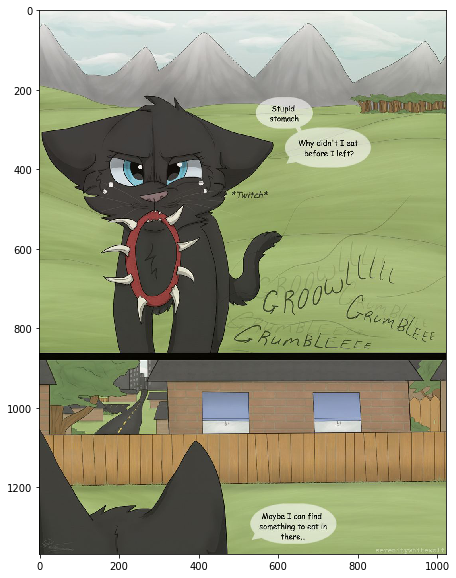

In [63]:
## See random samples
size = 10
np.random.shuffle(image_files)
image_files_subset = image_files[:size]
for image_file in image_files_subset:
    image_filename = os.path.basename(image_file)
    labels = labels_dict.get(image_filename)
    if not labels:
        continue
    
    img_pil = Image.open(image_file).convert('RGBA')
    print(img_pil.size)
    img = np.array(img_pil)
    print(img.shape)
    
    print(image_filename, labels)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img, cmap='gray')
    plt.show()